In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

### K-Means Cluster Analysis of Health Vulnerability

In [2]:
places_df = pd.read_csv('./data/places_by_location_2023.csv')
shortage_tracts_gdf = gpd.read_file('./data/shortage_tracts_gdf_1pcp220.geojson')

# Filter unserved columns and Add unserved density columns
shortage_tracts_gdf = shortage_tracts_gdf[(shortage_tracts_gdf['unserved_medicaid'] > 0) | (shortage_tracts_gdf['unserved_commercial'] > 0)]
shortage_tracts_gdf['unserved medicaid enrollees per km2'] = (shortage_tracts_gdf['unserved_medicaid'] / shortage_tracts_gdf['ALAND'] * 1000000).round(1)
shortage_tracts_gdf['unserved commercial insurance enrollees per km2'] = (shortage_tracts_gdf['unserved_commercial'] / shortage_tracts_gdf['ALAND'] * 1000000).round(1)

columns_to_keep = ['GEOID', 'geometry', 'unserved_medicaid', 'unserved medicaid enrollees per km2', 'unserved_commercial', 'unserved commercial insurance enrollees per km2']
shortage_tracts_gdf = shortage_tracts_gdf[columns_to_keep]

print(shortage_tracts_gdf.shape)
print(places_df.shape)

(1171, 6)
(72337, 13)


In [3]:
# Filter places_df based on shortage_tracts
tracts_to_keep = shortage_tracts_gdf['GEOID']
places_df = places_df[places_df['LocationID'].isin(tracts_to_keep)]
print(places_df.shape)
print(places_df.columns)

(1006, 13)
Index(['LocationID', 'No leisure-time physical activity', 'Binge drinking',
       'Sleeping less than 7 hours', 'Current smoking',
       'Cholesterol screening', 'Current lack of health insurance',
       'Taking medicine for high blood pressure control',
       'Visits to dentist or dental clinic',
       'Visits to doctor for routine checkup within the past',
       'Physical health not good for >=14 days',
       'Mental health not good for >=14 days',
       'Fair or poor self-rated health status'],
      dtype='object')


In [4]:
# Join datasets for clustering analysis
merged_gdf = shortage_tracts_gdf.merge(places_df, how='left', left_on='GEOID', right_on='LocationID')
merged_gdf = merged_gdf.dropna()
merged_gdf = merged_gdf[[
    'GEOID', 'geometry',
    'unserved medicaid enrollees per km2',
    'No leisure-time physical activity', 
    'Binge drinking',
    'Sleeping less than 7 hours', 'Current smoking',
    'Cholesterol screening', 'Current lack of health insurance',
    'Taking medicine for high blood pressure control',
    'Visits to dentist or dental clinic',
    'Visits to doctor for routine checkup within the past',
    'Physical health not good for >=14 days',
    'Mental health not good for >=14 days',
    'Fair or poor self-rated health status']]

cluster_df = merged_gdf[[
    'unserved medicaid enrollees per km2',
    'No leisure-time physical activity', 
    'Binge drinking',
    'Sleeping less than 7 hours', 'Current smoking',
    'Cholesterol screening', 'Current lack of health insurance',
    'Taking medicine for high blood pressure control',
    'Visits to dentist or dental clinic',
    'Visits to doctor for routine checkup within the past',
    'Physical health not good for >=14 days',
    'Mental health not good for >=14 days',
    'Fair or poor self-rated health status']]

display(cluster_df)

,unserved medicaid enrollees per km2,No leisure-time physical activity,Binge drinking,Sleeping less than 7 hours,Current smoking,Cholesterol screening,Current lack of health insurance,Taking medicine for high blood pressure control,Visits to dentist or dental clinic,Visits to doctor for routine checkup within the past,Physical health not good for >=14 days,Mental health not good for >=14 days,Fair or poor self-rated health status
5,0.3,19.3,19.6,33.6,16.3,89.0,4.4,76.8,70.3,77.6,10.1,13.7,12.0
6,1.4,28.3,16.6,34.8,20.5,86.4,6.6,79.2,61.9,76.2,12.7,15.7,17.3
7,0.0,28.5,17.2,34.9,20.8,85.3,6.7,78.5,61.4,75.5,12.5,15.8,17.0
8,2.9,23.8,18.2,34.1,17.6,86.8,5.1,77.1,66.5,75.5,10.9,14.8,13.9
9,3.0,28.6,17.1,35.0,20.2,85.2,6.6,78.7,61.6,75.7,12.5,16.1,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,3238.1,38.0,13.7,40.6,31.0,78.5,12.3,74.9,47.8,77.0,16.2,22.2,25.9
1167,3.1,22.6,16.7,32.5,18.4,88.4,4.5,78.6,70.9,79.3,11.2,15.1,13.7
1168,2319.4,44.8,12.6,44.2,35.8,76.2,17.8,75.4,39.8,78.4,19.7,25.3,34.1
1169,20.5,24.8,16.0,33.1,19.6,87.7,5.0,79.8,69.1,79.7,11.9,15.7,15.0


In [7]:
merged_gdf['GEOID'] = merged_gdf['GEOID'].astype(str)
merged_gdf.to_file('shortage_tracts_with_vulnerability.geojson', driver='GeoJSON')

### K-Means Cluster Analysis of Health Vulnerability

In [135]:
# Scale our features data to range between 0 and 1
# To do so we use the MinMaxScaler
# Note that this outputs a numpy array
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Transform the data
X = scaler.fit_transform(cluster_df)
print(type(X))
display(pd.DataFrame(X,columns=cluster_df.columns))

<class 'numpy.ndarray'>


,unserved medicaid enrollees per km2,No leisure-time physical activity,Binge drinking,Sleeping less than 7 hours,Current smoking,Cholesterol screening,Current lack of health insurance,Taking medicine for high blood pressure control,Visits to dentist or dental clinic,Visits to doctor for routine checkup within the past,Physical health not good for >=14 days,Mental health not good for >=14 days,Fair or poor self-rated health status
0,0.000007,0.1575,0.542714,0.368664,0.274096,0.834734,0.061372,0.845201,0.785029,0.594937,0.316092,0.239024,0.175342
1,0.000031,0.3825,0.391960,0.423963,0.400602,0.761905,0.140794,0.882353,0.623800,0.535865,0.465517,0.336585,0.320548
2,0.000000,0.3875,0.422111,0.428571,0.409639,0.731092,0.144404,0.871517,0.614203,0.506329,0.454023,0.341463,0.312329
3,0.000064,0.2700,0.472362,0.391705,0.313253,0.773109,0.086643,0.849845,0.712092,0.506329,0.362069,0.292683,0.227397
4,0.000066,0.3900,0.417085,0.433180,0.391566,0.728291,0.140794,0.874613,0.618042,0.514768,0.454023,0.356098,0.309589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,0.070994,0.6250,0.246231,0.691244,0.716867,0.540616,0.346570,0.815789,0.353167,0.569620,0.666667,0.653659,0.556164
1002,0.000068,0.2400,0.396985,0.317972,0.337349,0.817927,0.064982,0.873065,0.796545,0.666667,0.379310,0.307317,0.221918
1003,0.050852,0.7950,0.190955,0.857143,0.861446,0.476190,0.545126,0.823529,0.199616,0.628692,0.867816,0.804878,0.780822
1004,0.000449,0.2950,0.361809,0.345622,0.373494,0.798319,0.083032,0.891641,0.761996,0.683544,0.419540,0.336585,0.257534


C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:13

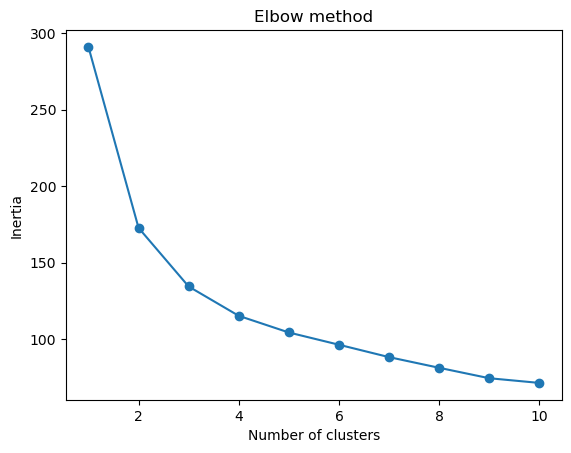

In [136]:
# Apply the elbow method to consider appropriate cluster size
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
    kmeans_elbow = KMeans(n_clusters=i, n_init="auto")
    kmeans_elbow.fit(X)
    inertias.append(kmeans_elbow.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [143]:
# Conduct the K-means analysis
# First defining a variable to control number of k categories
n_k = 4
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=n_k, random_state=0, n_init="auto").fit(X)
# Display out cluster center means
display(pd.DataFrame(np.round(kmeans_model.cluster_centers_, decimals=4),columns=cluster_df.columns))

C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,unserved medicaid enrollees per km2,No leisure-time physical activity,Binge drinking,Sleeping less than 7 hours,Current smoking,Cholesterol screening,Current lack of health insurance,Taking medicine for high blood pressure control,Visits to dentist or dental clinic,Visits to doctor for routine checkup within the past,Physical health not good for >=14 days,Mental health not good for >=14 days,Fair or poor self-rated health status
0,0.0627,0.3915,0.2898,0.7259,0.2025,0.8318,0.1982,0.8402,0.5800,0.7589,0.3422,0.3206,0.3374
1,0.2187,0.6711,0.2726,0.6494,0.4494,0.5995,0.5654,0.7920,0.3179,0.5362,0.6288,0.5623,0.5959
2,0.0919,0.4295,0.3691,0.4640,0.2831,0.7067,0.3112,0.7986,0.5259,0.5140,0.4029,0.3698,0.3484
3,0.0175,0.2257,0.4330,0.3062,0.1993,0.8180,0.1044,0.8444,0.7690,0.6048,0.2993,0.2480,0.1964


[3 2 2 ... 1 3 3]


C:\Users\kl3539\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


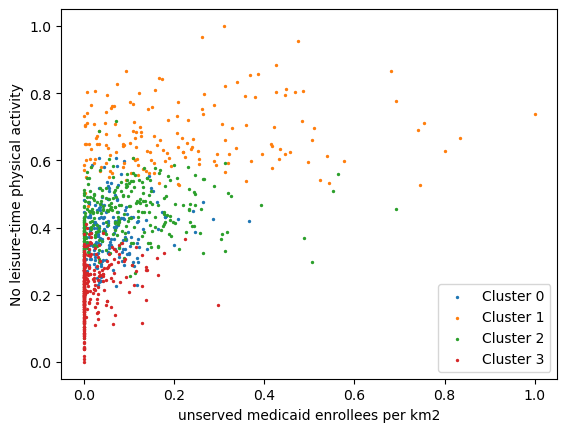

In [138]:
# Predict and visualize the clusters using pairs of features
# First make the predictions 
y_label = kmeans_model.fit_predict(X)
print(y_label)

# Then do some  looping to plot clusters for pairs of features 
columnx = 0
columny = 1
for i in range(0,n_k):
    plt.scatter(X[y_label==i, columnx], X[y_label==i, columny], s=2, label ='Cluster '+str(i))

plt.xlabel(cluster_df.columns[columnx])
plt.ylabel(cluster_df.columns[columny])
plt.legend(loc="lower right")
plt.show()

Cluster 0: "Moderate but inconsistent Healthcare Engagement" - 
Health Behavior: This label reflects the combination of moderate physical inactivity and smoking habits that signal inconsistent health practices.
Health Status: Points to moderate physical and mental health challenges.
Access to Healthcare: Indicates moderate access with a certain percentage of unserved Medicaid enrollees, suggesting that while there is some access, it's not fully optimized.
Healthcare Utilization: Describes a population that engages with healthcare services to some extent, as evidenced by medication for blood pressure control and regular health screenings, yet may not fully utilize preventive services.ts.

Cluster 1:High-Risk & Healthcare Arseup" 
Health Behavior: Very high levels of physical inactivity and smoking; indicates risky health behaviors.
Health Status: Very poor, with the highest levels of self-reported poor health.
Access to Healthcare: Low, evidenced by the highest rate of lacking health insurance.
Healthcare Utilization: Very low, with the lowest rates of preventive healthcare activities like dental visits and cholesterol screeningst.

Cluster Moderate Vigilance & Lifestyle Balanceroup
Health Behavior: Shows more balanced health behaviors, with lower rates of smoking and better physical activity levels.
Health Status: Moderate, with somewhat better self-rated health than Clusters 0 and 1.
Access to Healthcare: Moderate to good, with fewer unserved Medicaid enrollees and better insurance coverage.
Healthcare Utilization: Moderate, reflected in the rates of routine checkups and disease management.ges.

Cluste"Health-Conscious & Well-Serviced" Gro
Health Behavior: Indicates very active engagement in health-enhancing behaviors and the highest binge drinking rates, which may suggest a demographic with specific social habits.
Health Status: Best among all, with the lowest rates of reported poor physical and mental health.
Access to Healthcare: Excellent, with the lowest rates of unserved Medicaid enrollees and high health insurance coverage.
Healthcare Utilization: Very high, with the most frequent visits to doctors and dentists, indicating a strong pattern of healthcare utilization.erved.

In [139]:
# Get cluster center means and export it for ChatGPT to label them.
cluster_centers_vulnerability = pd.DataFrame(np.round(kmeans_model.cluster_centers_, decimals=4),columns=cluster_df.columns)
cluster_centers_vulnerability.to_csv('cluster_centers_vulnerability.csv', index=False)

#Add cluster assignments to the original DataFrame and export it
merged_gdf['cluster_health_vulnerability'] = kmeans_model.labels_
merged_gdf.to_file('cluster_vulnerability.geojson', driver='GeoJSON')